# SVD

In [1]:
import pprint
import scipy
import scipy.linalg # SciPy Linear Algebra Library
import numpy as np

A = np.array([ [4,4],[-3,3] ])
U, S, V = scipy.linalg.svd(A)
V1 = np.transpose(V)
print("Orthogonal Matrix of AA':")
pprint.pprint(U)

print("Diagonal Matrix with singular Values:")
pprint.pprint(S)

print("Orthogonal Matrix of A'A:")
pprint.pprint(V)

Orthogonal Matrix of AA':
array([[-1.00000000e+00, -3.70074342e-18],
       [ 3.70074342e-18,  1.00000000e+00]])
Diagonal Matrix with singular Values:
array([5.65685425, 4.24264069])
Orthogonal Matrix of A'A:
array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])


# Image Compression

(638, 638) (638,) (960, 960)


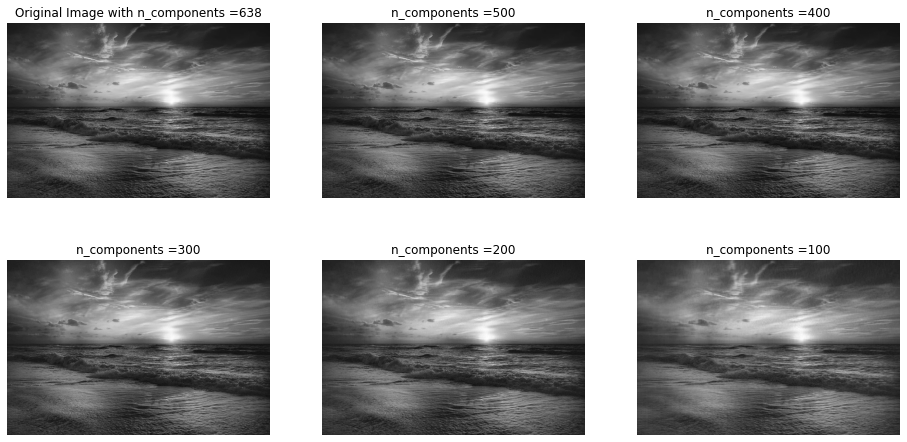

In [2]:
# get the image from "https://cdn.pixabay.com/photo/2017/03/27/16/50/beach-2179624_960_720.jpg"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# read image in grayscale
img = cv2.imread('beach-2179624_960_720.jpg', 0)

# obtain svd
U, S, V = np.linalg.svd(img)

# inspect shapes of the matrices
print(U.shape, S.shape, V.shape)

# plot images with different number of components
comps = [638, 500, 400, 300, 200, 100]

plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

# Image Compression 
Detail from Durer’s Melancolia, dated 1514.

(667, 667) (640,) (640, 640)


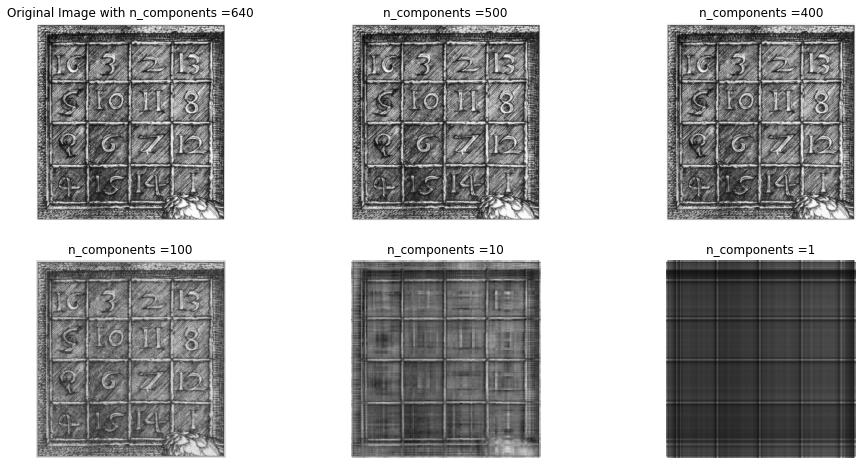

In [52]:
img = cv2.imread('4x4magicsquare.jpg',0)
U, S, V = np.linalg.svd(img)
print(U.shape, S.shape, V.shape)
comps = [640, 500, 400, 100, 10, 1]
plt.figure(figsize = (16, 8))
for i in range(6):
    low_rank = U[:, :comps[i]] @ np.diag(S[:comps[i]]) @ V[:comps[i], :]
    if(i  == 0):
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("Original Image with n_components =" + str(comps[i]))
    else:
        plt.subplot(2, 3, i+1), plt.imshow(low_rank, cmap = 'gray'), plt.axis('off'), plt.title("n_components =" + str(comps[i]))

In [ ]:
X: full dataset
U,s,Vt = svd(X, k = 50) #apply SVD for the first time
take the first left singular vectors (e.g. 10 or 50)
remaining_point_ids = range(0, n)
for each column i in U:
  point_ids = sort the values U[:,i] and extract the point ids corresponding to 
      top highest and top lowest
  remaining_point_ids.remove_all(point_ids)

X1 = X[remaining_point_ids,:] #create a new dataset with the remaining point ids
again apply SVD, find points with very high/very low U[:,i] and remove them

In [2]:
#Importing libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



# In[2]:

#Giving path for training images
Path2 = Path2 = './1/'
files2 = os.listdir(Path2)
images = []

In [ ]:
#Readling all the images and storing into an array
for name in files2:
    temp = cv2.imread(Path2+name)
    print (temp)
    temp = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
    temp = cv2.resize(temp, (100,100), interpolation = cv2.INTER_AREA)
    images.append(temp.flatten())

In [12]:
#Substractng mean from all images for normalization    
images = np.array(images)
mu = np.mean(images)
images = images-mu
images = images.T
print (images.shape)


# In[3]:

#SVD function
u,s,v = np.linalg.svd(images, full_matrices=False)
print( u.shape, s.shape , v.shape)


# In[4]:

#Reading test image as an input, converting into 100*100 
test = np.array(cv2.imread('./test_images/subject11.rightlight.jpg'))
test = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
test = cv2.resize(test, (100,100), interpolation = cv2.INTER_AREA)

img = test.reshape(1, -1)

#Substracting mean
img = img-mu

img = img.T
print( img[:][50])


# In[5]:

#Dot product of test image and U matrix
test_x = np.empty(shape = (u.shape[0], u.shape[1]),  dtype=np.int8)
print (test_x.shape)

for col in range(u.shape[1]):    
    test_x[:,col] = img[:,0] * u[:,col]

dot_test = np.array(test_x, dtype='int8').flatten()


# In[6]:

#Dot product of all the images and U matrix
dot_train = np.empty(shape = (u.shape[0]*u.shape[1], u.shape[1]),  dtype=np.int8)
temp = np.empty(shape = (u.shape[0], u.shape[1]),  dtype=np.int8)


for i in range(images.shape[1]):
    
    for c in range(u.shape[1]):    
        temp[:,c] = images[:,i] * u[:,c]
        
    tempF = np.array(temp, dtype='int8').flatten()
    dot_train[:, i] = tempF[:]


# In[7]:

#Substracting Two dot products
sub = np.empty(shape = (u.shape[0]*u.shape[1], u.shape[1]))

for col in range(u.shape[1]):
    sub[:,col] = dot_train[:,col] - dot_test[:]


# In[8]:



#Finding norm of all the colums
answer = np.empty(shape=(u.shape[1],))

for c in range(sub.shape[1]):    
    answer[c] = np.linalg.norm(sub[:,c])


# In[9]:


print( answer)


# In[10]:

#Sorting answer array and retriving first element which will be minimum from all
temp_ans = np.empty(shape=(u.shape[1],))
temp=np.copy(answer)

temp.sort()
check = temp[0]
print( check)


# In[11]:


index=0

for i in range(answer.shape[0]):
    if check == answer[i]:
        
        index=i
 
        break


# In[12]:

#Checking for corresponding image for minimum answer
folder_tr = '/dataimage/'
i = 0
print (index)
for filename in os.listdir(os.getcwd()+"/"+folder_tr):
    
    if index == i:
        print ("The predicted face is: ",filename)
        break
        
    else:
        i=i+1

(10000, 240)
(10000, 240) (240,) (240, 240)


TypeError: Expected Ptr<cv::UMat> for argument 'src'

In [11]:
path = r'C:\Users\f1\COLLEGE PROGRAMS\LINEAR ALGEBRA\4x4magicsquare.jpg'
# Reading an image in default mode 
image = cv2.imread(path) 
  
# Window name in which image is displayed 
window_name = 'image'
  
# Using cv2.imshow() method  
# Displaying the image  
cv2.imshow(window_name, image) 
  
#waits for user to press any key  
#(this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(20000)  
  
#closing all open windows  
cv2.destroyAllWindows()

# SVD for Spectral Clustering

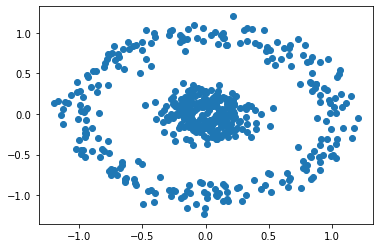

D:\Softwares\Anaconda\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


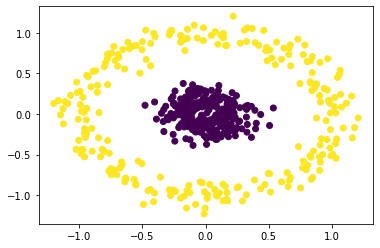

In [5]:
# import required functions and libraries
from sklearn.datasets import make_circles
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
#import numpy as np
#import matplotlib.pyplot as plt

# generate your data
X, labels = make_circles(n_samples=500, noise=0.1, factor=.2)

# plot your data
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# train and predict
s_cluster = SpectralClustering(n_clusters = 2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X)
        
# plot clustered data
plt.scatter(X[:, 0], X[:, 1], c = s_cluster)
plt.show()

# SVD in NumPy

In [6]:
#import numpy as np
from numpy.linalg import svd

# define your matrix as a 2D numpy array
A = np.array([[4, 0], [3, -5]])

U, S, VT = svd(A)

print("Left Singular Vectors:")
print(U)
print("Singular Values:") 
print(np.diag(S))
print("Right Singular Vectors:") 
print(VT)

# check that this is an exact decomposition
# @ is used for matrix multiplication in Py3, use np.matmul with Py2
print(U @ np.diag(S) @ VT)

Left Singular Vectors:
[[-0.4472136  -0.89442719]
 [-0.89442719  0.4472136 ]]
Singular Values:
[[6.32455532 0.        ]
 [0.         3.16227766]]
Right Singular Vectors:
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
[[ 4.00000000e+00 -1.11022302e-15]
 [ 3.00000000e+00 -5.00000000e+00]]


# Truncated SVD in scikit-learn

In [7]:
#import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[ 0.31622777  2.21359436]
 [ 2.52982213 -1.26491106]
 [-1.58113883 -1.58113883]]


# Randomized SVD in scikit-learn

In [8]:
#import numpy as np
from sklearn.decomposition import TruncatedSVD

A = np.array([[-1, 2, 0], [2, 0, -2], [0, -2, 1]])
print("Original Matrix:")
print(A)

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(A)

print("Singular values:")
print(svd.singular_values_)

print("Transformed Matrix after reducing to 2 features:")
print(A_transf)

Original Matrix:
[[-1  2  0]
 [ 2  0 -2]
 [ 0 -2  1]]
Singular values:
[3. 3.]
Transformed Matrix after reducing to 2 features:
[[-1.39100469 -1.7507444 ]
 [-1.5444914   2.36950339]
 [ 2.16325039  0.56599271]]
